In [1]:
import gymnasium as gym
import numpy as np
import pickle as pkl

import cv2
from PIL import Image
import matplotlib.pyplot as plt

cliffEnv = gym.make("CliffWalking-v0")
reward_cache_qlearning = []
step_cache_qlearning = []

q_table = np.zeros(shape=(cliffEnv.observation_space.n, cliffEnv.action_space.n))

# Parameters
EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.9
NUM_EPISODES = 500


def policy(state, explore=0.0):
    # exploration vs exploitation
    if np.random.random() <= explore:
        # Explore
        action = int(np.random.randint(low=0, high=cliffEnv.action_space.n, size=1))
    else:
        # Exploit
        action = ? 

    return action


for episode in range(NUM_EPISODES):

    done = False

    total_reward = 0
    episode_length = 0

    state, _ = cliffEnv.reset()

    while not done:
        action = policy(state, EPSILON)
        next_state, reward, done, truncated, _ = cliffEnv.step(action)
        
        next_action = ?
        
        # Q(next_state, next_action)
        Q_nextSA = ?
        # Temporal Difference
        TDerror = ?
        # Update Q-table for this state action pair
        q_table[state][action] += ?
        
        state = next_state

        total_reward += reward
        episode_length += 1
        
    reward_cache_qlearning.append(total_reward)
    step_cache_qlearning.append(episode_length)

    print("Episode:", episode, "Episode Length:",
          episode_length, "Total Reward:", total_reward)


cliffEnv.close()

pkl.dump(q_table, open("q_learning_q_table.pkl", "wb"))

print("Training Complete, Q Table Saved :)")


Episode: 0 Episode Length: 121 Total Reward: -121
Episode: 1 Episode Length: 818 Total Reward: -2105
Episode: 2 Episode Length: 205 Total Reward: -205
Episode: 3 Episode Length: 246 Total Reward: -345
Episode: 4 Episode Length: 271 Total Reward: -271
Episode: 5 Episode Length: 156 Total Reward: -354
Episode: 6 Episode Length: 223 Total Reward: -421
Episode: 7 Episode Length: 161 Total Reward: -359
Episode: 8 Episode Length: 202 Total Reward: -202
Episode: 9 Episode Length: 221 Total Reward: -419
Episode: 10 Episode Length: 103 Total Reward: -202
Episode: 11 Episode Length: 133 Total Reward: -133
Episode: 12 Episode Length: 132 Total Reward: -429
Episode: 13 Episode Length: 74 Total Reward: -74
Episode: 14 Episode Length: 194 Total Reward: -293
Episode: 15 Episode Length: 208 Total Reward: -604
Episode: 16 Episode Length: 87 Total Reward: -186
Episode: 17 Episode Length: 111 Total Reward: -210
Episode: 18 Episode Length: 100 Total Reward: -100
Episode: 19 Episode Length: 139 Total Rewar

Episode: 180 Episode Length: 15 Total Reward: -15
Episode: 181 Episode Length: 31 Total Reward: -31
Episode: 182 Episode Length: 17 Total Reward: -17
Episode: 183 Episode Length: 54 Total Reward: -153
Episode: 184 Episode Length: 27 Total Reward: -27
Episode: 185 Episode Length: 23 Total Reward: -23
Episode: 186 Episode Length: 13 Total Reward: -13
Episode: 187 Episode Length: 30 Total Reward: -30
Episode: 188 Episode Length: 16 Total Reward: -16
Episode: 189 Episode Length: 38 Total Reward: -38
Episode: 190 Episode Length: 15 Total Reward: -15
Episode: 191 Episode Length: 33 Total Reward: -33
Episode: 192 Episode Length: 15 Total Reward: -15
Episode: 193 Episode Length: 31 Total Reward: -31
Episode: 194 Episode Length: 17 Total Reward: -17
Episode: 195 Episode Length: 29 Total Reward: -326
Episode: 196 Episode Length: 15 Total Reward: -114
Episode: 197 Episode Length: 33 Total Reward: -33
Episode: 198 Episode Length: 17 Total Reward: -17
Episode: 199 Episode Length: 26 Total Reward: -

In [2]:
q_table

array([[  -6.85394377,   -6.8558945 ,   -6.87197746,   -6.86136116],
       [  -6.68708685,   -6.69496636,   -6.72056664,   -6.71411126],
       [  -6.46164928,   -6.4664343 ,   -6.50213037,   -6.51629266],
       [  -6.21759295,   -6.1867932 ,   -6.2272213 ,   -6.22386585],
       [  -5.93526096,   -5.89063064,   -5.91634523,   -5.9003795 ],
       [  -5.55361104,   -5.53860285,   -5.56451415,   -5.58438554],
       [  -5.17441117,   -5.15272138,   -5.14546759,   -5.17778808],
       [  -4.72292175,   -4.73199654,   -4.74196552,   -4.74223035],
       [  -4.28771455,   -4.26929036,   -4.291196  ,   -4.27342245],
       [  -3.80647242,   -3.76336145,   -3.7896098 ,   -3.80942273],
       [  -3.23441733,   -3.24037593,   -3.23158617,   -3.30558258],
       [  -2.73744265,   -2.67008917,   -2.65042923,   -2.81636701],
       [  -6.99435875,   -6.98629595,   -7.01603699,   -6.98461245],
       [  -6.78871619,   -6.78970461,   -6.85810348,   -6.7884525 ],
       [  -6.56046803,   -6.545412

# Q-learning Visualization

In [3]:
cliffEnv = gym.make("CliffWalking-v0")

q_table = pkl.load(open("q_learning_q_table.pkl", "rb"))


# Creates cliff walking grid
def initialize_frame():
    width, height = 600, 200
    img = np.ones(shape=(height, width, 3)) * 255.0
    margin_horizontal = 6
    margin_vertical = 2

    # Vertical Lines
    for i in range(13):
        img = cv2.line(img, (49 * i + margin_horizontal, margin_vertical),
                       (49 * i + margin_horizontal, 200 - margin_vertical), color=(0, 0, 0), thickness=1)

    # Horizontal Lines
    for i in range(5):
        img = cv2.line(img, (margin_horizontal, 49 * i + margin_vertical),
                       (600 - margin_horizontal, 49 * i + margin_vertical), color=(0, 0, 0), thickness=1)

    # Cliff Box
    img = cv2.rectangle(img, (49 * 1 + margin_horizontal + 2, 49 * 3 + margin_vertical + 2),
                        (49 * 11 + margin_horizontal - 2, 49 * 4 + margin_vertical - 2), color=(255, 0, 255),
                        thickness=-1)
    img = cv2.putText(img, text="Cliff", org=(49 * 5 + margin_horizontal, 49 * 4 + margin_vertical - 10),
                      fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

    # Goal
    frame = cv2.putText(img, text="G", org=(49 * 11 + margin_horizontal + 10, 49 * 4 + margin_vertical - 10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    return frame


# puts the agent at a state
def put_agent(img, state):
    margin_horizontal = 6
    margin_vertical = 2
    row, column = divmod(state, 12)
    cv2.putText(img, text="A", org=(49 * column + margin_horizontal + 10, 49 * (row + 1) + margin_vertical - 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    return img


def policy(state, explore=0.0):
    action = int(np.argmax(q_table[state]))
    if np.random.random() <= explore:
        action = int(np.random.randint(low=0, high=4, size=1))
    return action


NUM_EPISODES = 3

frames = []  # for gif

for episode in range(NUM_EPISODES):

    done = False

    total_reward = 0
    episode_length = 0

    frame = initialize_frame()
    state, _ = cliffEnv.reset()

    while not done:
        frame2 = put_agent(frame.copy(), state)

        # Append the frame as a PIL Image
        frames.append(Image.fromarray(frame2.astype('uint8')))

        cv2.imshow("Cliff Walking", frame2)
        cv2.waitKey(250)
        action = policy(state)
        state, reward, done, _, _ = cliffEnv.step(action)

        total_reward += reward
        episode_length += 1

    print("Episode:", episode, "Episode Length:",
          episode_length, "Reward:", total_reward)
    
    # Close the display window after each episode
    cv2.destroyAllWindows()


# Save the frames as a GIF
frames[0].save('Q-Learning Agent.gif', format='GIF',
               append_images=frames[1:], save_all=True, duration=250)


cliffEnv.close()

Episode: 0 Episode Length: 13 Reward: -13
Episode: 1 Episode Length: 13 Reward: -13
Episode: 2 Episode Length: 13 Reward: -13


# SARSA

In [4]:
cliffEnv = gym.make("CliffWalking-v0")

q_table = np.zeros(shape=(cliffEnv.observation_space.n, cliffEnv.action_space.n))
reward_cache_SARSA = []
step_cache_SARSA = []

# Parameters
EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.9

NUM_EPISODES = 500

def policy(state, explore=0.0):
    if np.random.random() <= explore:
        # Explore
        action = int(np.random.randint(low=cliffEnv.action_space.n))
    else:
        # Exploit
        action = ?

    return action

for episode in range(NUM_EPISODES):

    done = False
    total_reward = 0
    episode_length = 0

    state, _ = cliffEnv.reset()
    action = policy(state, EPSILON)

    while not done:
        next_state, reward, done, truncated, _ = cliffEnv.step(action)
        
        next_action = ?
        
        # Update Q-table
        q_table[state][action] += ?
        
        state = next_state
        action = next_action

        total_reward += reward
        episode_length += 1
        
    reward_cache_SARSA.append(total_reward)
    step_cache_SARSA.append(episode_length)

    print("Episode:", episode, "Episode Length:", episode_length, "Total Reward:", total_reward)

cliffEnv.close()

pkl.dump(q_table, open("sarsa_q_table.pkl", "wb"))

print("Training Complete, Q Table Saved :)")


Episode: 0 Episode Length: 139 Total Reward: -337
Episode: 1 Episode Length: 800 Total Reward: -1988
Episode: 2 Episode Length: 277 Total Reward: -277
Episode: 3 Episode Length: 242 Total Reward: -539
Episode: 4 Episode Length: 315 Total Reward: -414
Episode: 5 Episode Length: 57 Total Reward: -57
Episode: 6 Episode Length: 176 Total Reward: -176
Episode: 7 Episode Length: 168 Total Reward: -267
Episode: 8 Episode Length: 296 Total Reward: -593
Episode: 9 Episode Length: 207 Total Reward: -306
Episode: 10 Episode Length: 185 Total Reward: -185
Episode: 11 Episode Length: 174 Total Reward: -174
Episode: 12 Episode Length: 72 Total Reward: -72
Episode: 13 Episode Length: 129 Total Reward: -228
Episode: 14 Episode Length: 163 Total Reward: -163
Episode: 15 Episode Length: 131 Total Reward: -131
Episode: 16 Episode Length: 123 Total Reward: -222
Episode: 17 Episode Length: 148 Total Reward: -247
Episode: 18 Episode Length: 126 Total Reward: -126
Episode: 19 Episode Length: 172 Total Reward

Episode: 325 Episode Length: 21 Total Reward: -120
Episode: 326 Episode Length: 24 Total Reward: -24
Episode: 327 Episode Length: 17 Total Reward: -17
Episode: 328 Episode Length: 27 Total Reward: -27
Episode: 329 Episode Length: 20 Total Reward: -20
Episode: 330 Episode Length: 23 Total Reward: -23
Episode: 331 Episode Length: 20 Total Reward: -20
Episode: 332 Episode Length: 19 Total Reward: -19
Episode: 333 Episode Length: 19 Total Reward: -19
Episode: 334 Episode Length: 20 Total Reward: -20
Episode: 335 Episode Length: 17 Total Reward: -17
Episode: 336 Episode Length: 17 Total Reward: -17
Episode: 337 Episode Length: 19 Total Reward: -19
Episode: 338 Episode Length: 31 Total Reward: -31
Episode: 339 Episode Length: 19 Total Reward: -19
Episode: 340 Episode Length: 17 Total Reward: -17
Episode: 341 Episode Length: 26 Total Reward: -26
Episode: 342 Episode Length: 21 Total Reward: -21
Episode: 343 Episode Length: 18 Total Reward: -18
Episode: 344 Episode Length: 22 Total Reward: -22

In [5]:
q_table

array([[ -7.78010498,  -7.73824167,  -7.76835011,  -7.80065021],
       [ -7.49242589,  -7.48641844,  -7.59382791,  -7.63708747],
       [ -7.23042434,  -7.21118163,  -7.21396239,  -7.42594886],
       [ -6.99974126,  -6.9101929 ,  -6.91051316,  -7.00709452],
       [ -6.63388499,  -6.57184511,  -6.58290677,  -6.70648214],
       [ -6.21976479,  -6.16159831,  -6.18059226,  -6.47477934],
       [ -5.8442263 ,  -5.74127453,  -5.7491729 ,  -6.04688137],
       [ -5.3162024 ,  -5.28440785,  -5.29423011,  -5.36862457],
       [ -4.82375011,  -4.77702899,  -4.80150796,  -4.96372194],
       [ -4.21570094,  -4.20819892,  -4.22156209,  -4.58443577],
       [ -3.70320016,  -3.5971141 ,  -3.64473924,  -3.73845664],
       [ -3.04477397,  -3.07125657,  -2.88986458,  -3.083482  ],
       [ -7.95672696,  -7.67586781,  -8.13727329,  -8.00007192],
       [ -7.73259038,  -7.33385886,  -7.80023641,  -7.80637037],
       [ -7.27445735,  -7.00364437,  -8.68344225,  -7.33116203],
       [ -6.78215886,  -6

# SARSA Visualization

In [6]:
cliffEnv = gym.make("CliffWalking-v0")

# Load the SARSA Q-table
q_table = pkl.load(open("sarsa_q_table.pkl", "rb"))

# Creates cliff walking grid
def initialize_frame():
    width, height = 600, 200
    img = np.ones(shape=(height, width, 3)) * 255.0
    margin_horizontal = 6
    margin_vertical = 2

    # Vertical Lines
    for i in range(13):
        img = cv2.line(img, (49 * i + margin_horizontal, margin_vertical),
                       (49 * i + margin_horizontal, 200 - margin_vertical), color=(0, 0, 0), thickness=1)

    # Horizontal Lines
    for i in range(5):
        img = cv2.line(img, (margin_horizontal, 49 * i + margin_vertical),
                       (600 - margin_horizontal, 49 * i + margin_vertical), color=(0, 0, 0), thickness=1)

    # Cliff Box
    img = cv2.rectangle(img, (49 * 1 + margin_horizontal + 2, 49 * 3 + margin_vertical + 2),
                        (49 * 11 + margin_horizontal - 2, 49 * 4 + margin_vertical - 2), color=(255, 0, 255),
                        thickness=-1)
    img = cv2.putText(img, text="Cliff", org=(49 * 5 + margin_horizontal, 49 * 4 + margin_vertical - 10),
                      fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

    # Goal
    frame = cv2.putText(img, text="G", org=(49 * 11 + margin_horizontal + 10, 49 * 4 + margin_vertical - 10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    # Start
    # frame = cv2.putText(img, text="S", org=(49 * 0 + margin_horizontal + 10, 49 * 4 + margin_vertical - 10),
    #                     fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    return frame

# Puts the agent at a state
def put_agent(img, state):
    margin_horizontal = 6
    margin_vertical = 2
    row, column = np.unravel_index(indices=state, shape=(4, 12))
    cv2.putText(img, text="A", org=(49 * column + margin_horizontal + 10, 49 * (row + 1) + margin_vertical - 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    return img

def policy(state, explore=0.0):
    action = int(np.argmax(q_table[state]))
    if np.random.random() <= explore:
        action = int(np.random.randint(low=cliffEnv.action_space.n))
    return action

NUM_EPISODES = 3
frames = []  # for gif

for episode in range(NUM_EPISODES):
    done = False
    total_reward = 0
    episode_length = 0

    frame = initialize_frame()
    state, _ = cliffEnv.reset()

    while not done:
        frame2 = put_agent(frame.copy(), state)

        # Append the frame as a PIL Image
        frames.append(Image.fromarray(frame2.astype('uint8')))

        cv2.imshow("Cliff Walking", frame2)
        cv2.waitKey(250)
        action = policy(state)
        state, reward, done, truncated, _ = cliffEnv.step(action)

        total_reward += reward
        episode_length += 1

    print("Episode:", episode, "Episode Length:", episode_length, "Reward:", total_reward)
    # Close the display window after each episode
    cv2.destroyAllWindows()

# Save the frames as a GIF
frames[0].save('Sarsa_Agent.gif', format='GIF',
               append_images=frames[1:], save_all=True, duration=250)

cliffEnv.close()


Episode: 0 Episode Length: 15 Reward: -15
Episode: 1 Episode Length: 15 Reward: -15
Episode: 2 Episode Length: 15 Reward: -15


# Plot performance Q-learning vs Sarsa

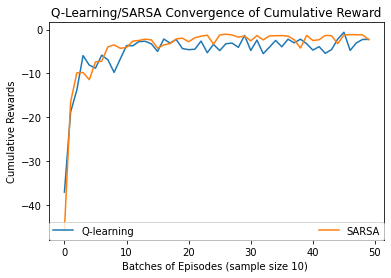

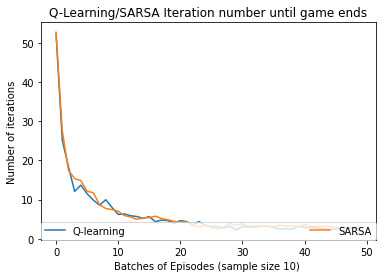

In [7]:
def plot_cumreward_normalized(reward_cache_qlearning, reward_cache_SARSA):
    """
    Visualizes the reward convergence
    
    Args:
        reward_cache -- type(list) contains cumulative_reward
    """
    cum_rewards_q = []
    rewards_mean_q = np.array(reward_cache_qlearning).mean()
    rewards_std_q = np.array(reward_cache_qlearning).std()
    count = 0 # used to determine the batches
    cur_reward = 0 # accumulate reward for the batch
    for cache in reward_cache_qlearning:
        count = count + 1
        cur_reward += cache
        if(count == 10):
            # normalize the sample
            normalized_reward = (cur_reward - rewards_mean_q)/rewards_std_q
            cum_rewards_q.append(normalized_reward)
            cur_reward = 0
            count = 0
            
    cum_rewards_SARSA = []
    rewards_mean_sarsa = np.array(reward_cache_SARSA).mean()
    rewards_std_sarsa = np.array(reward_cache_SARSA).std()
    count = 0 # used to determine the batches
    cur_reward = 0 # accumulate reward for the batch
    for cache in reward_cache_SARSA:
        count = count + 1
        cur_reward += cache
        if(count == 10):
            # normalize the sample
            normalized_reward = (cur_reward - rewards_mean_sarsa)/rewards_std_sarsa
            cum_rewards_SARSA.append(normalized_reward)
            cur_reward = 0
            count = 0      
    # prepare the graph    
    plt.plot(cum_rewards_q, label = "Q-learning")
    plt.plot(cum_rewards_SARSA, label = "SARSA")
    plt.ylabel('Cumulative Rewards')
    plt.xlabel('Batches of Episodes (sample size 10) ')
    plt.title("Q-Learning/SARSA Convergence of Cumulative Reward")
    plt.legend(loc='lower right', ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    
def plot_number_steps(step_cache_qlearning, step_cache_SARSA):
    """
        Visualize number of steps taken
    """    
    cum_step_q = []
    steps_mean_q = np.array(step_cache_qlearning).mean()
    steps_std_q = np.array(step_cache_qlearning).std()
    count = 0 # used to determine the batches
    cur_step = 0 # accumulate reward for the batch
    for cache in step_cache_qlearning:
        count = count + 1
        cur_step += cache
        if(count == 10):
            # normalize the sample
            normalized_step = (cur_step - steps_mean_q)/steps_std_q
            cum_step_q.append(normalized_step)
            cur_step = 0
            count = 0
            
    cum_step_SARSA = []
    steps_mean_sarsa = np.array(step_cache_SARSA).mean()
    steps_std_sarsa = np.array(step_cache_SARSA).std()
    count = 0 # used to determine the batches
    cur_step = 0 # accumulate reward for the batch
    for cache in step_cache_SARSA:
        count = count + 1
        cur_step += cache
        if(count == 10):
            # normalize the sample
            normalized_step = (cur_step - steps_mean_sarsa)/steps_std_sarsa
            cum_step_SARSA.append(normalized_step)
            cur_step = 0
            count = 0      
    # prepare the graph    
    plt.plot(cum_step_q, label = "Q-learning")
    plt.plot(cum_step_SARSA, label = "SARSA")
    plt.ylabel('Number of iterations')
    plt.xlabel('Batches of Episodes (sample size 10) ')
    plt.title("Q-Learning/SARSA Iteration number until game ends")
    plt.legend(loc='lower right', ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

# Plot cumulative rewards
plot_cumreward_normalized(reward_cache_qlearning, reward_cache_SARSA)

# Plot number of steps
plot_number_steps(step_cache_qlearning, step_cache_SARSA)